# Course 4: Introduction to Machine Learning

## Final Project

### Student Details

<span style="color:darkgreen">Name:</span> Sundar Ram Subramanian <br>
<span style="color:darkgreen">Student ID:</span> 23946913<br>
<span style="color:darkgreen">Subject Code:</span> INFO 521<br>
<span style="color:darkgreen">Subject Title:</span> Introduction to Machine Learning


### Setting up the workspace

#### Importing Necessary Library packages

In [1]:
#For Data reading & Manipulation
import pandas as pd
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Miscelaneous
import warnings

##Machine Learning Related

#For Data Encoding
from sklearn.preprocessing import LabelEncoder
#For Scaling
from sklearn.preprocessing import StandardScaler
#For Training & Testing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#For Classification Models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
#For Model Metrics
from sklearn.metrics import f1_score,confusion_matrix, classification_report, roc_curve, auc
#For Hyperparameter tuning
from sklearn.model_selection import GridSearchCV


#### Default settings

In [2]:
#Default settings
pd.set_option('display.max_colwidth', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

### Reading Data

In [3]:
#Read & Display head of Data
df = pd.read_csv("German_bank.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


### Exploratory Data Analysis

#### Data Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>

1. *Dataset Overview:*
   - The dataset contains **1000 rows** and **17 columns**.
   - No missing values were found in any column.

2. *Data Types:*
   - **7 Numerical Columns:** (`int64`)
     - `months_loan_duration`
     - `amount`
     - `percent_of_income`
     - `years_at_residence`
     - `age`
     - `existing_loans_count`
     - `dependents`
   - **10 Categorical Columns:** (`object`)
     - `checking_balance`
     - `credit_history`
     - `purpose`
     - `savings_balance`
     - `employment_duration`
     - `other_credit`
     - `housing`
     - `job`
     - `phone`
     - `default` (Target Variable)

In [5]:
#Checking Balance
print("Checking Balance:\n", df['checking_balance'].value_counts(), "\n")

#Months Loan Duration
print("Months Loan Duration:\n", df['months_loan_duration'].value_counts(), "\n")

#Credit History
print("Credit History:\n", df['credit_history'].value_counts(), "\n")

#Purpose
print("Purpose:\n", df['purpose'].value_counts(), "\n")

#Loan Amount
print("Loan Amount:\n", df['amount'].value_counts(), "\n")

#Savings Balance
print("Savings Balance:\n", df['savings_balance'].value_counts(), "\n")

#Employment Duration
print("Employment Duration:\n", df['employment_duration'].value_counts(), "\n")

#Percent of Income
print("Percent of Income:\n", df['percent_of_income'].value_counts(), "\n")

#Years at Residence
print("Years at Residence:\n", df['years_at_residence'].value_counts(), "\n")

#Age
print("Age:\n", df['age'].value_counts(), "\n")

#Other Credit
print("Other Credit:\n", df['other_credit'].value_counts(), "\n")

#Housing
print("Housing:\n", df['housing'].value_counts(), "\n")

#Existing Loans Count
print("Existing Loans Count:\n", df['existing_loans_count'].value_counts(), "\n")

#Job
print("Job:\n", df['job'].value_counts(), "\n")

#Dependents
print("Dependents:\n", df['dependents'].value_counts(), "\n")

#Phone
print("Phone:\n", df['phone'].value_counts(), "\n")

#Default (Target Variable)
print("Default:\n", df['default'].value_counts(), "\n")


Checking Balance:
 checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64 

Months Loan Duration:
 months_loan_duration
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: count, dtype: int64 

Credit History:
 credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64 

Purpose:
 purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64 

Loan Amount:
 amount
1478    3
1262    3
1258    3
1275    3
1393    3
       ..
1459    1
882     1
37

<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>
- It can be observed that the data captured as such is clean
- Though features like months_loan_duration, years_at_residence, existing_loans_count, and dependents are of type int64, they are categorical in nature

In [6]:
df_description = df.describe(include='all').T
df_description

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
checking_balance,1000,4,unknown,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
months_loan_duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
credit_history,1000,5,good,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,1000,6,furniture/appliances,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
savings_balance,1000,5,< 100 DM,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_duration,1000,5,1 - 4 years,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percent_of_income,1000.0,NaN,NaN,NaN,2.973,1.118715,1.0,2.0,3.0,4.0,4.0
years_at_residence,1000.0,NaN,NaN,NaN,2.845,1.103718,1.0,2.0,3.0,4.0,4.0
age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0


<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>

***Numerical Features:***
1. *Loan Duration (`months_loan_duration`):*
   - **Mean:** ~20.9 months
   - **Range:** 4 to 72 months
   - **Interpretation:** The 75th percentile is at 24 months, indicating many short-term loans.

2. *Loan Amount (`amount`):*
   - **Mean:** ~3,271
   - **Range:** 250 to 18,424
   - **Interpretation:** The standard deviation is **2,822**, suggesting high variability in loan amounts.

***Categorical Features:***
1. *Checking Balance (`checking_balance`):*
   - **Most Common Value:** `unknown` (394 occurrences)
   - Indicates that a significant portion of customers may not disclose their checking balance.

2. *Credit History (`credit_history`):*
   - **Most Common Value:** `good` (530 occurrences)
   - Majority of customers have a good credit history. Most of them have not defaulted.

3. *Purpose of Loan (`purpose`):*
   - **Most Common Purpose:** `furniture/appliances` (473 occurrences)
   - Suggests that many loans are used for household-related purchases.

#### Class Imbalance

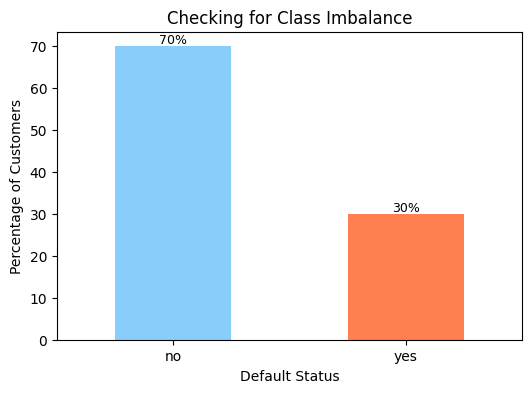

In [7]:
#Check the distribution of the target variable 'default'
default_distribution = df['default'].value_counts(normalize=True) * 100

#Plot bar chart for default distribution
plt.figure(figsize=(6, 4))
ax = default_distribution.plot(kind='bar', color=['lightskyblue', 'coral'])

#Adding Data Labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}%", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9) #, fontweight='bold', color='black'

#Add labels and title
plt.xlabel("Default Status")
plt.ylabel("Percentage of Customers")
plt.title("Checking for Class Imbalance")
plt.xticks(rotation=0)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>

Following can be observed:
- The dataset is **moderately imbalanced** (70:30 ratio).
- This imbalance may affect model performance, esp in case of Logistic regression while tree based models mostly take care of moderate imbalances.


#### Features Correlation

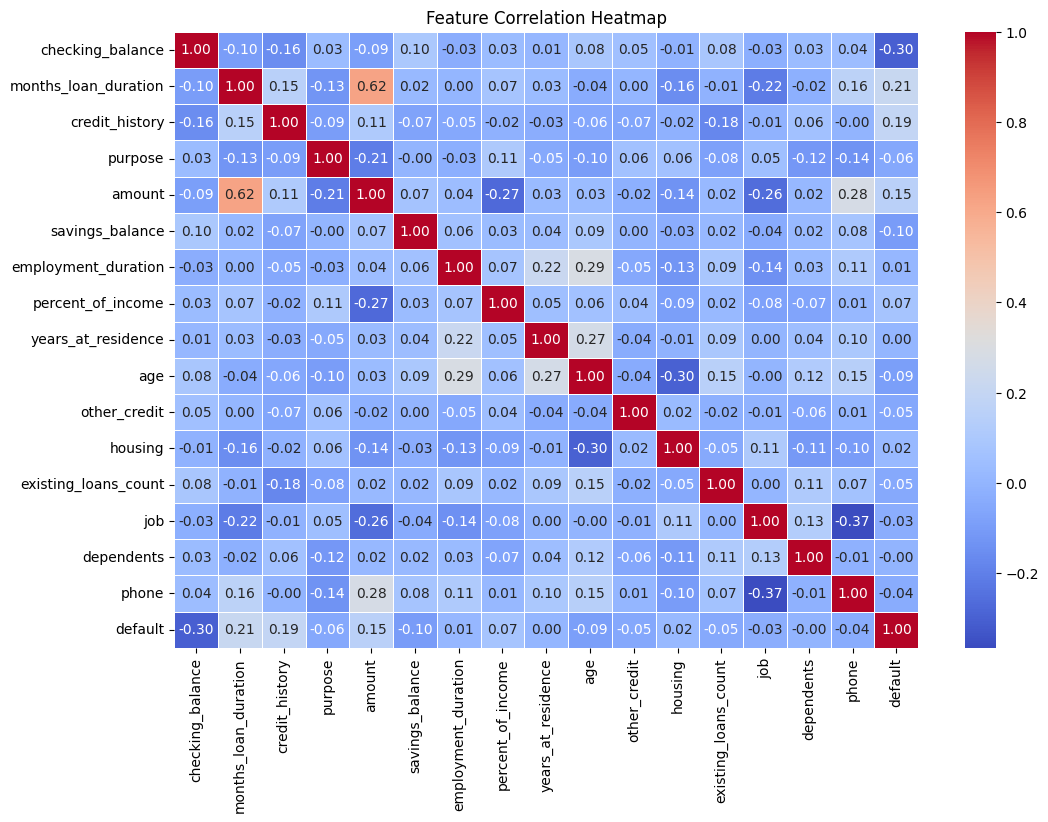

In [8]:
#Encode categorical variables using Label Encoding for correlation analysis
df_encoded_feature_correlation = df.copy()
categorical_cols = df_encoded_feature_correlation.select_dtypes(include=['object']).columns

#Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded_feature_correlation[col] = le.fit_transform(df_encoded_feature_correlation[col])
    label_encoders[col] = le

#Compute the correlation matrix with all features
correlation_matrix_all = df_encoded_feature_correlation.corr()

#Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>

1. ***Correlation with `default`:***
   - `checking_balance`, `months_loan_duration`, `credit_history` & `amount`  show a **positive correlation** with `default` with checking_balance having the strongest correlation.
      - Higher loan amounts or longer durations may be linked to a higher default risk.
   - It is also observed that `savings_balance` & `age` has a **negative correlation** with `default`, not so strong though.
   - Other features like `purpose`, `other_credit`, `existing_loans_count`, `job` & `phone` have a weak **negative correlation** with `default`, while, `employment_duration`, `percent_of_income`, `housing` have weak **positive correlation**.
   - Features like `years_at_residence` & `dependents` have virtually **no correlation** with `default`.

2. ***Correlation amongst predictors:***
   - It can be observed that `amount` & `months_loan_duration` are very strongly **positively correlated**, which is logical that larger loans often have longer repayment periods.
   - `age` and `years_at_residence` are **positively correlated**, suggesting older individuals tend to have longer residence durations.

3. ***Multicollinearity:***
   - No extremely strong correlations amongst variables, implying that **multicollinearity is not a major concern**.

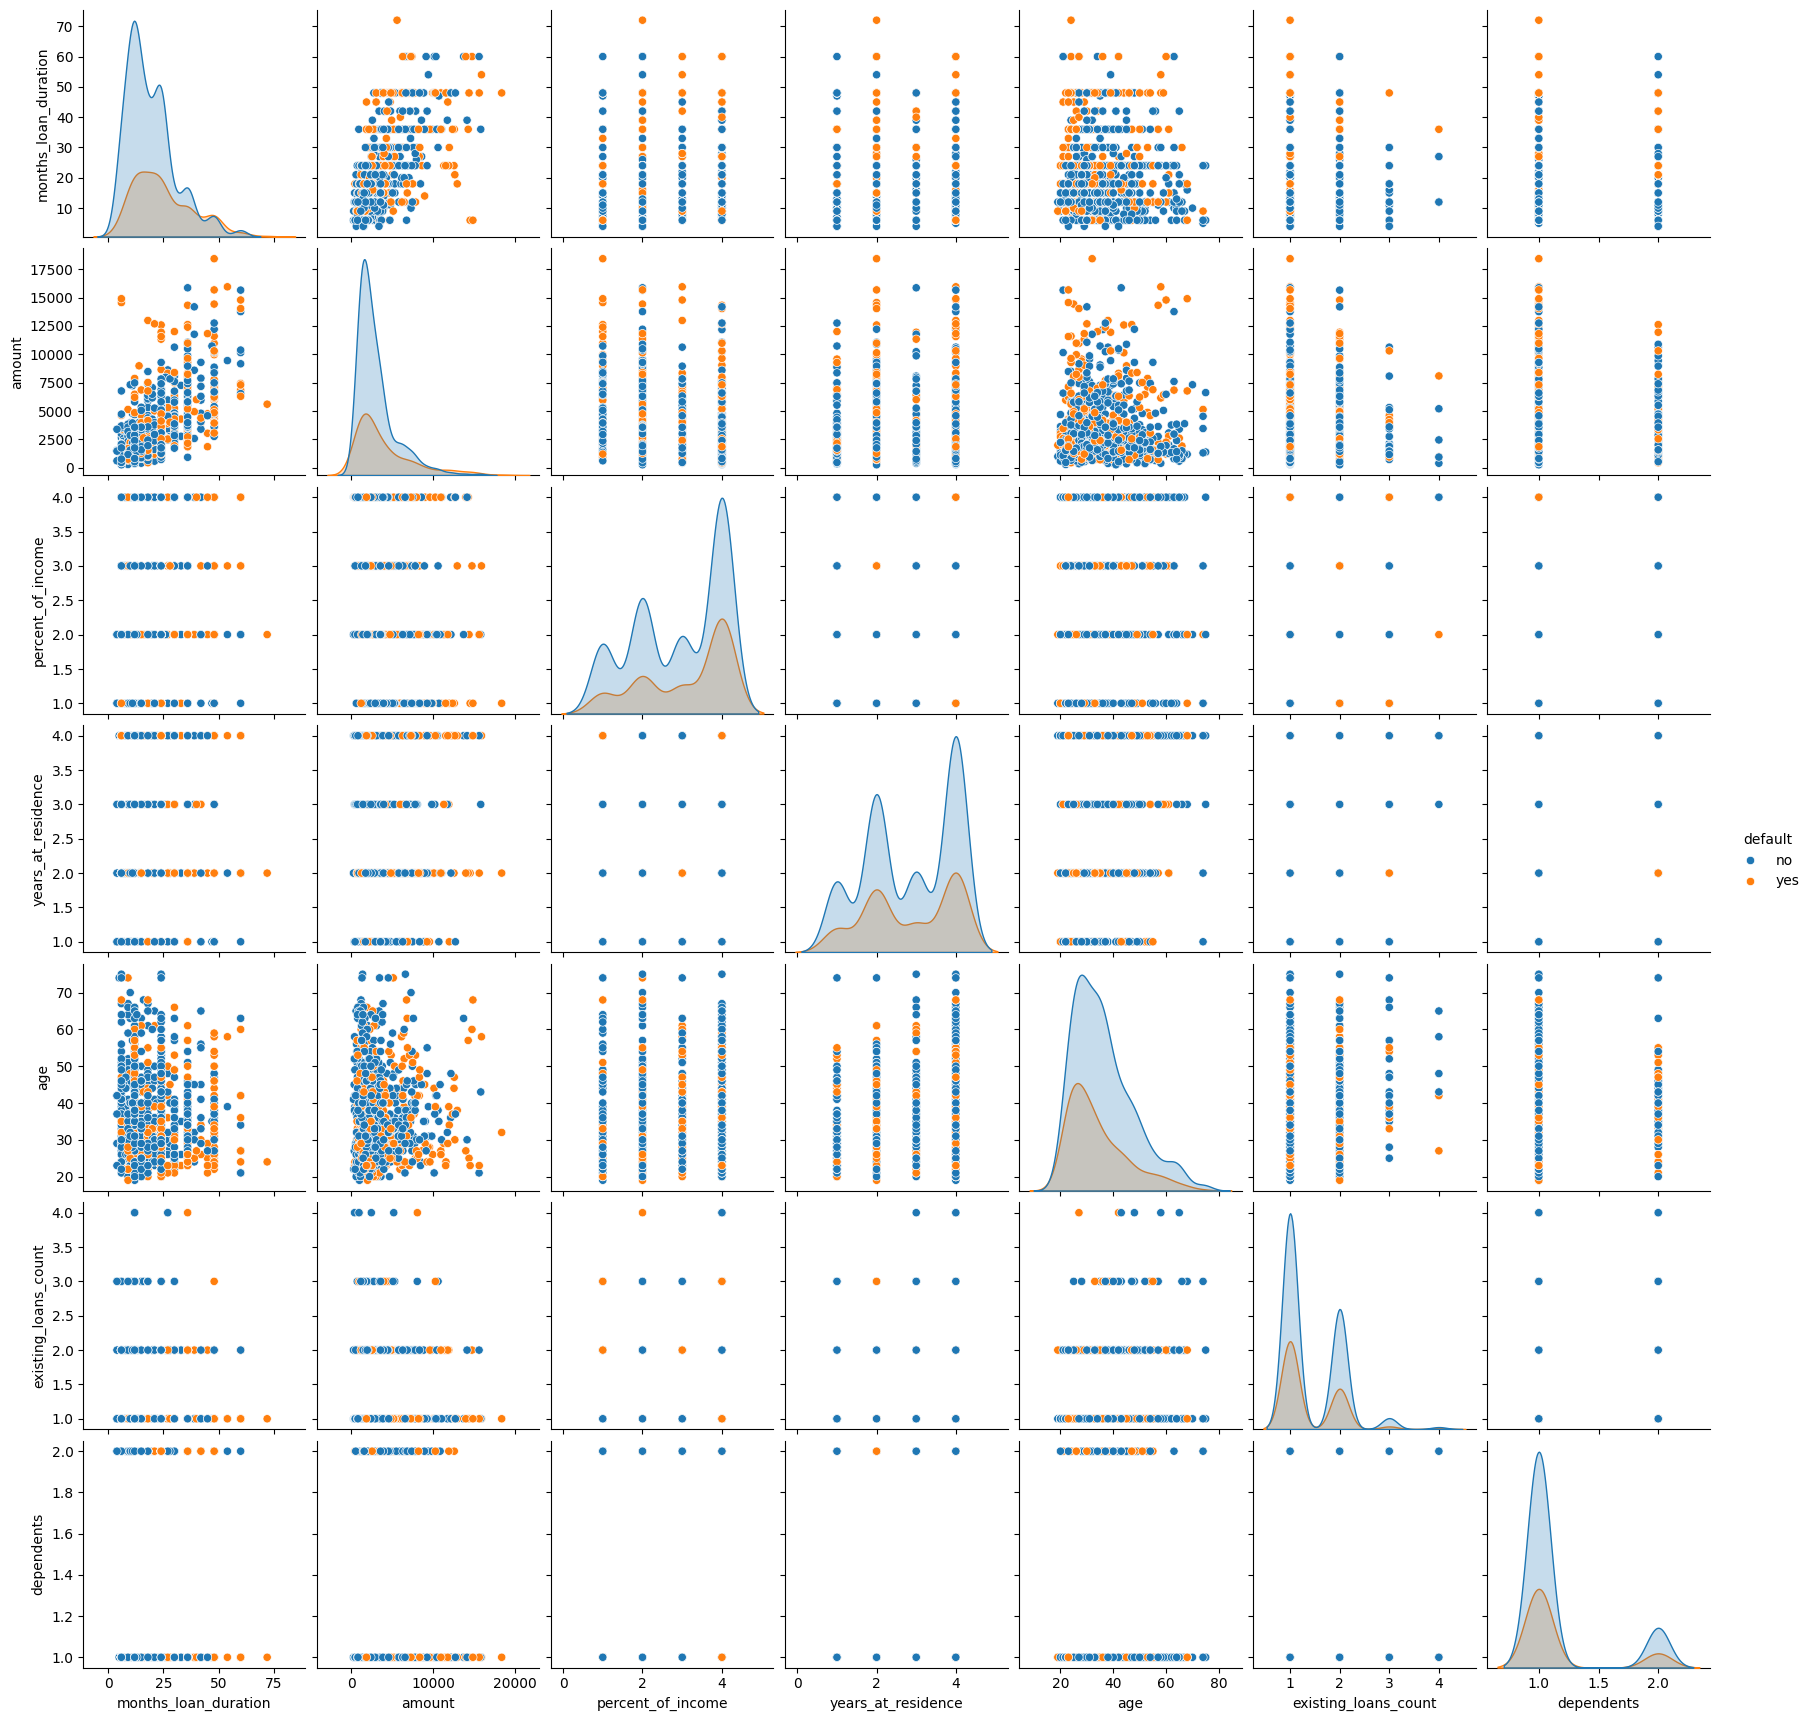

In [9]:
sns.pairplot(df, hue='default')

<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>

- The pair plot confirms the Correlation that was observed previously.
- It is observed that people with higher `amount` loans **tend to default more often**.
- `existing_loans_count` might have a **slight trend where people with more existing loans are more likely to default**.
- Younger individuals (lower age) appear to **default more frequently**.


#### Histogram Analysis

<Figure size 1200x1000 with 0 Axes>

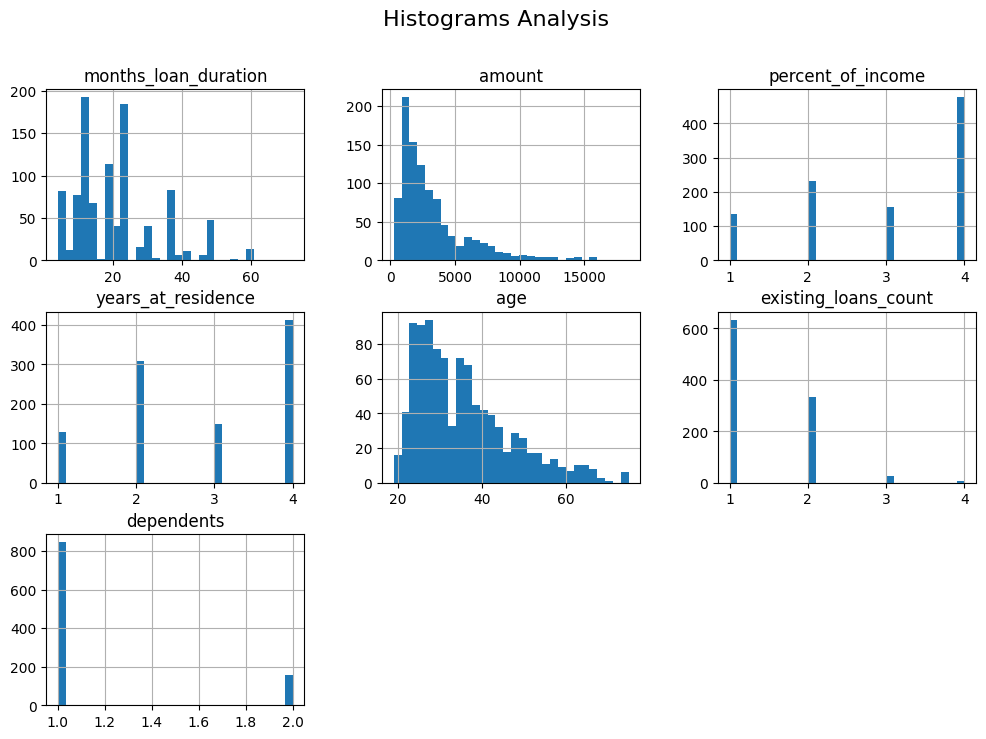

In [10]:
#Histograms of numerical columns
plt.figure(figsize=(12, 10))
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms Analysis", fontsize=16)
plt.show()

<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>

From the **histograms**, it can be observed that `amount`, `age`, `percent_of_income` are **right-skewed**, which implies there might be outliers.

#### Outlier Analysis

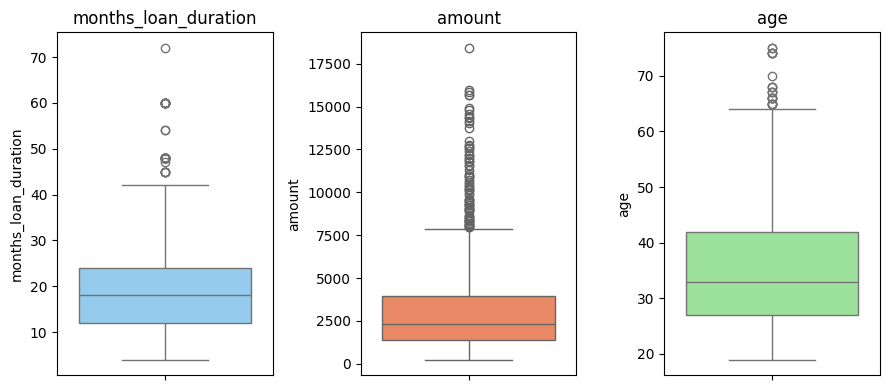

In [11]:
#Select only continuous columns for outlier analysis
continuous_columns = ["months_loan_duration", "amount", "age"]

#Set up the figure size
plt.figure(figsize=(9, 4))

#Define different colors for each box
box_colors = ['lightskyblue', 'coral', 'lightgreen']

#Create box plots for each continuous column
for i, (col, color) in enumerate(zip(continuous_columns, box_colors), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color=color)  # Set box color
    plt.title(col)

plt.tight_layout()
plt.show()


<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>

1. *Months Loan Duration*
   - The **median** loan duration is around **18-20 months.**
   - The IQR spans approximately **12 to 24 months.**
   - There are **outliers above 40 months**, indicating a few customers have loans with significantly longer durations (50+ months).

2. *Loan Amount*
   - The loan amount is **highly skewed** with many **outliers above 10,000**.
   - Most loans are **below 5000**, but some **extend to 15,000-18,000**, which might indicate high-risk or large-scale loans.

3. *Age*
   - The median age is **around 32-35 years**.
   - The interquartile range (IQR) spans approximately **25 to 45 years**.
   - There are **several older outliers (65+ years)**, indicating that a few customers are taking loans even in retirement age.


<span style="color:darkgreen;">However, we will go ahead with the outliers in the data, as they represent the actual values and are not missing data. Thereby retaining the data originality</span><br>


#### Categorical Features Analysis

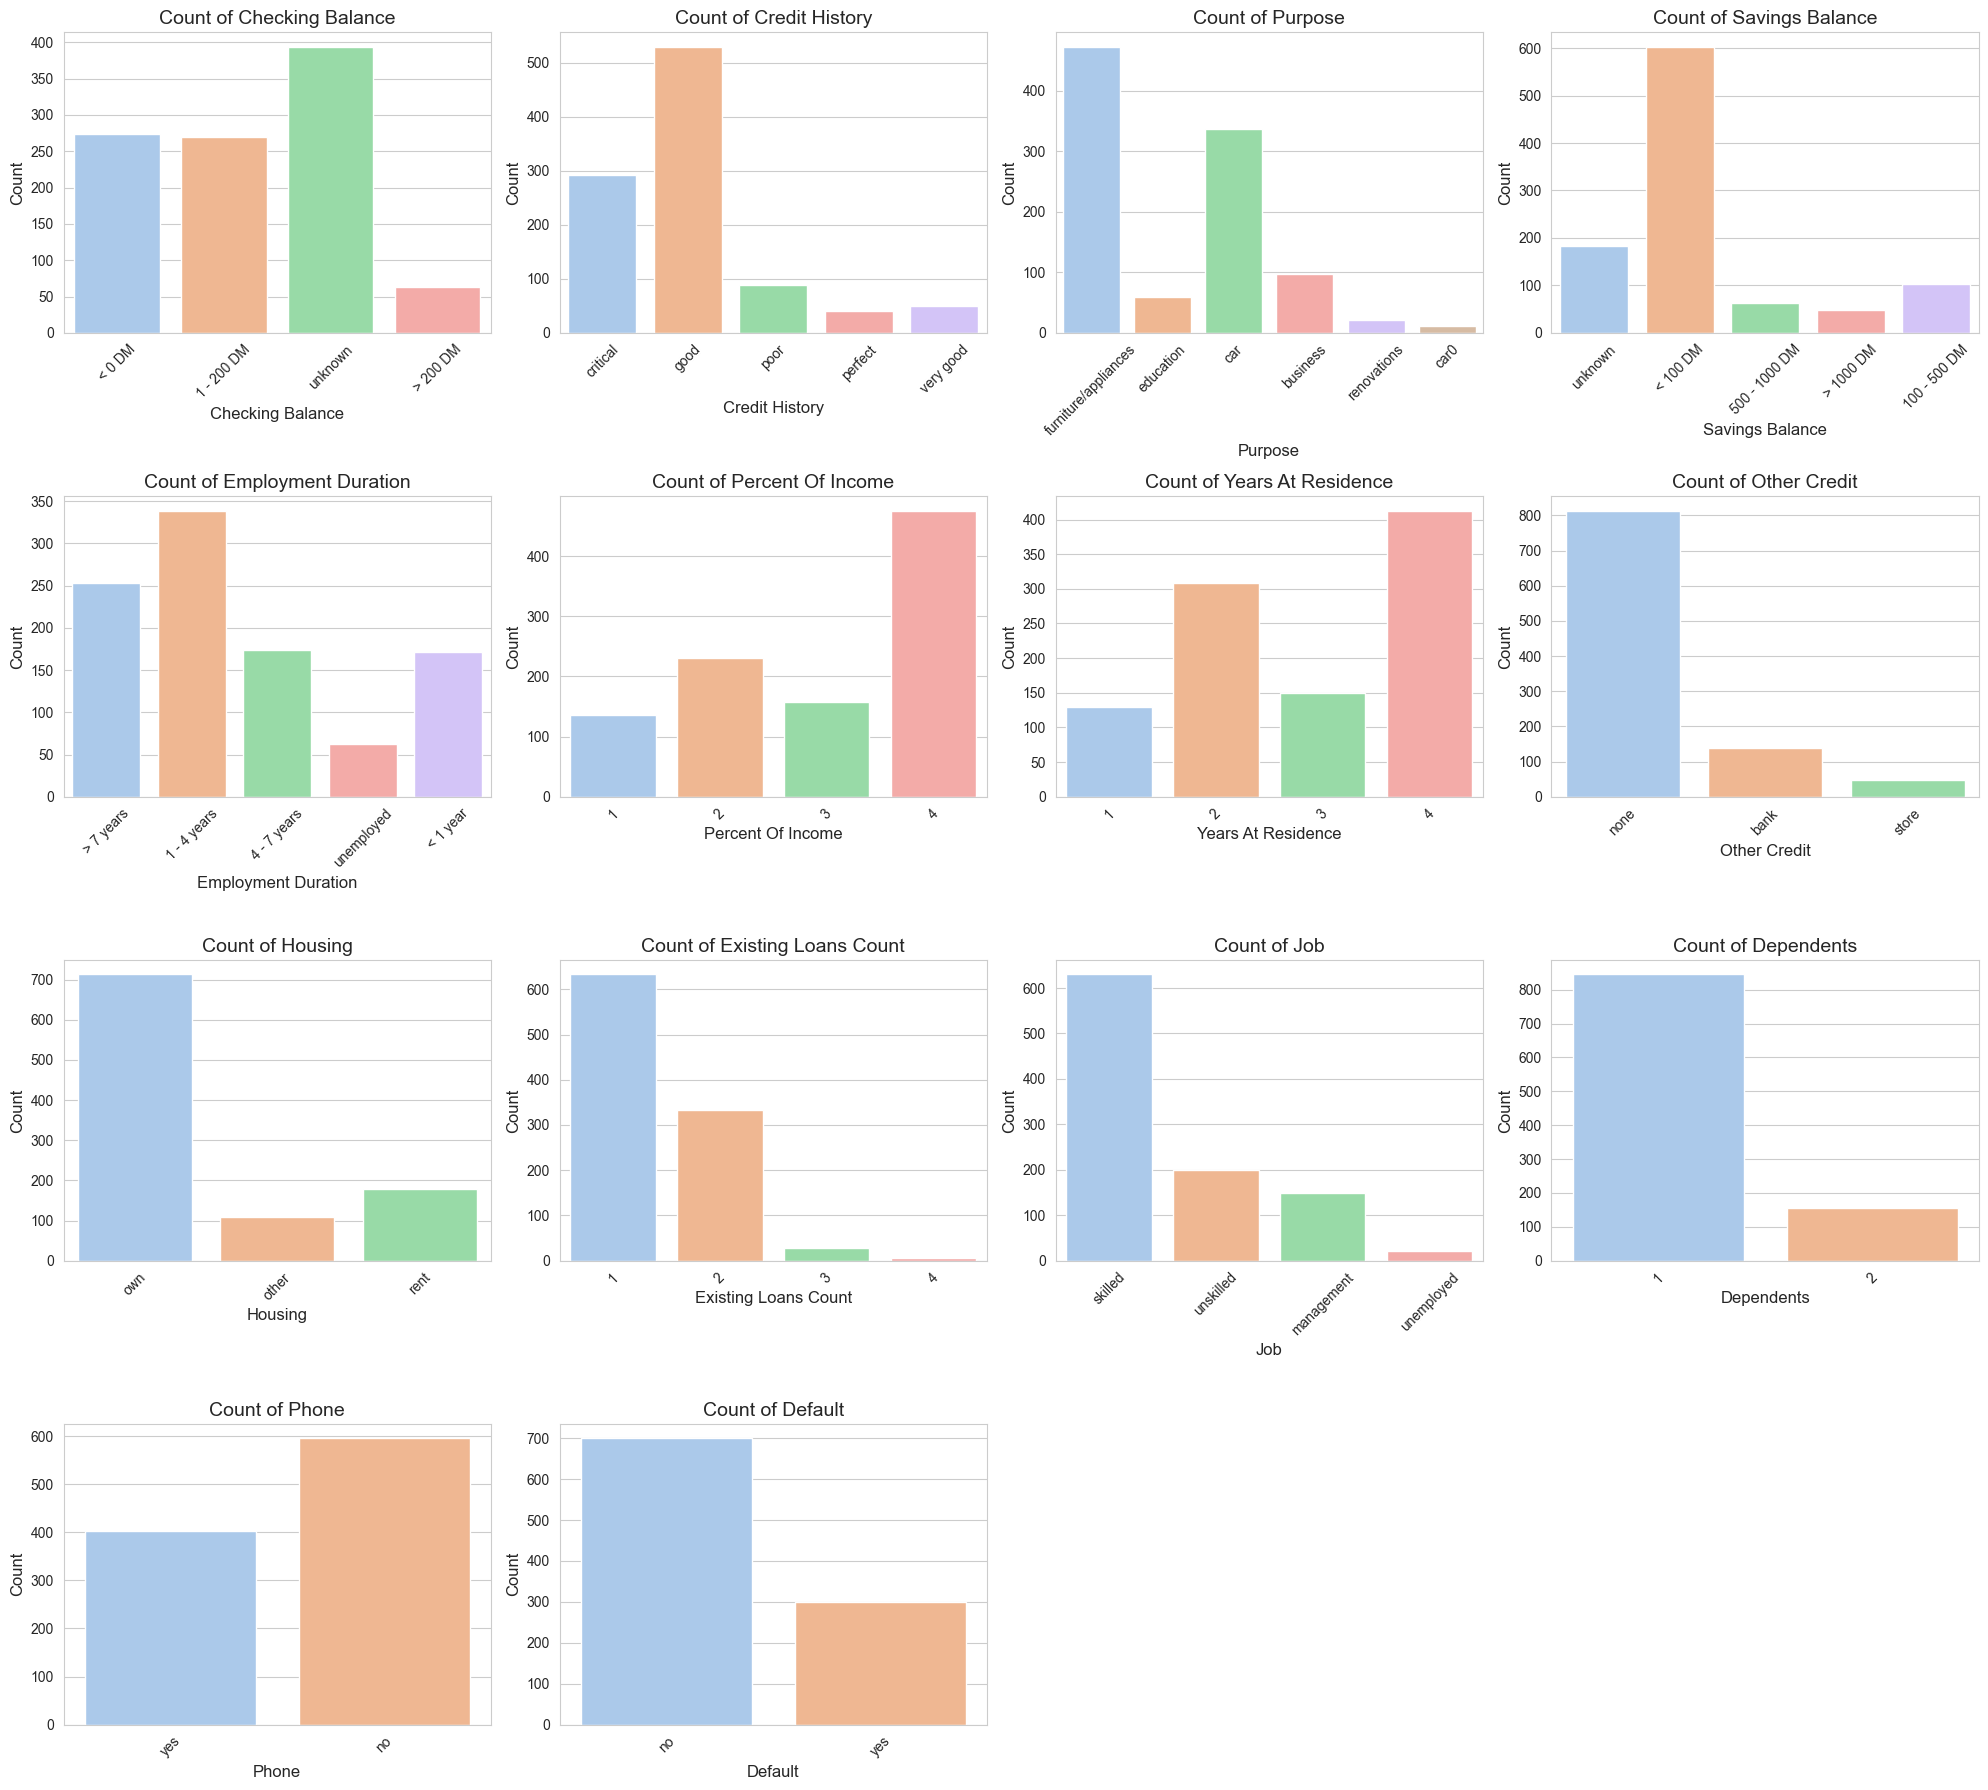

In [12]:
#Subset the DataFrame to include only the specified columns
categorical_columns = [
                        'checking_balance', 'credit_history', 'purpose', 'savings_balance',
                        'employment_duration', 'percent_of_income', 'years_at_residence',
                        'other_credit', 'housing', 'existing_loans_count', 'job', 'dependents',
                        'phone', 'default'
                    ]
df_cat = df[categorical_columns]

#Set the aesthetic style of the plots
sns.set_style("whitegrid")

#Determine the number of rows and columns for the subplot grid
n_cols = 4
n_rows = 4

#Create the figure with subplots
plt.figure(figsize=(20, 18))

for index, column in enumerate(categorical_columns, start=1):
    plt.subplot(n_rows, n_cols, index)
    sns.countplot(x=column, data=df, palette='pastel')
    plt.title(f'Count of {column.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(column.title().replace("_", " "), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)  # Rotate labels to prevent overlap

plt.tight_layout()
plt.show()


<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>

**1.Checking Balance:**
- A significant number of people have an "unknown" checking balance, which suggests that many do not disclose this information or it's not available.
- The counts for "< 0 DM" and "1 - 200 DM" are nearly the same, indicating a similar number of customers in these two categories, while "> 200 DM" is less common.

**2.Credit History:**
- Most individuals have a "good" credit history, which might indicate a generally reliable borrower base.
- The least common credit history is "perfect," suggesting that very few have an exceptional borrowing record.

**3.Purpose:**
- "Car" and "furniture/appliances" are the most common purposes for loans, indicating common financing needs among the borrowers.
- Educational and renovation loans are less frequent, which might reflect less frequent investment in these areas or alternate funding sources for such needs.

**4.Savings Balance:**
- The majority of individuals have savings of "< 100 DM," indicating low savings balances.
- Very few have savings "> 1000 DM," which could imply a lower capacity to save among the dataset's individuals.

**5.Employment Duration:**
- A substantial number of individuals have been employed "1 - 4 years," suggesting a relatively young workforce or high turnover in jobs.
- Those "unemployed" or employed "> 7 years" are fewer, showing less frequency at these extremes.

**6.Percent of Income:**
- The modal class for percentage of income committed to loan payments or obligations appears to be "4%", indicating possibly higher loan commitments relative to income.
- Fewer individuals commit only "1%" of their income, which might indicate caution or limited credit participation.

**7.Years at Residence:**
- A significant number of individuals have lived at their residence for "4+" years, suggesting stability in living conditions.
- Those with "1 year" at residence are the least, possibly reflecting recent moves or instability.

**8.Other Credit:**
- Most have "none" other credit, which could suggest a limited engagement with multiple credit lines or a focus on fewer, larger loans.
- Those with "bank" or "store" credit are notably fewer, possibly indicating specialized or less frequent borrowing needs.

**9.Housing:**
- The majority live in "own" housing, indicating a stable and possibly more financially secure demographic.
- Rental and "other" types of housing are less common, which may reflect less mobility or lower need for such arrangements.

**10.Existing Loans Count:**
- A majority have "1" existing loan, suggesting that most individuals do not have multiple loan burdens.
- Very few have "3" or more loans, pointing to a general aversion or ineligibility for multiple concurrent loans.

**11.Job:**
- "Skilled" individuals dominate, suggesting a well-trained or educated workforce.
- "Unemployed" individuals are the least, which could reflect selective loan approvals or a generally employed borrower base.

**12.Dependents:**
- Most individuals have "1" dependent, which could influence their financial commitments and borrowing needs.
- Few have "2" dependents, which might indicate smaller family sizes or different financial priorities.

**13.Phone:**
- A roughly equal distribution between having and not having a "phone" registered, which could impact communication or service offerings.

**14.Default:**
- The majority have "no" default, indicating a generally reliable repayment among the borrowers.
- Those who have defaulted ("yes") are significantly fewer, but this still represents a risk factor for lenders.

### Data Pre Processing

#### Encoding

We prefer **Label Encoding** as one hot encoding leads to increased dimensionality thereby increasinng the complexity of data

In [13]:
#Copy the original dataframe to avoid modifying it directly
df_encoded = df.copy()

#Identify categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

#Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  #Store the encoder for potential inverse transformation

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int64
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int64
 3   purpose               1000 non-null   int64
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int64
 6   employment_duration   1000 non-null   int64
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int64
 11  housing               1000 non-null   int64
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int64
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int64
 16  default

In [14]:
#List of columns for which we need value counts
columns = df_encoded.columns  

#Loop through each column and print value counts
for col in columns:
    print(f"{col}:\n{df_encoded[col].value_counts()}\n")


checking_balance:
checking_balance
3    394
1    274
0    269
2     63
Name: count, dtype: int64

months_loan_duration:
months_loan_duration
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: count, dtype: int64

credit_history:
credit_history
1    530
0    293
3     88
4     49
2     40
Name: count, dtype: int64

purpose:
purpose
4    473
1    337
0     97
3     59
5     22
2     12
Name: count, dtype: int64

amount:
amount
1478    3
1262    3
1258    3
1275    3
1393    3
       ..
1459    1
882     1
3758    1
1136    1
4576    1
Name: count, Length: 921, dtype: int64

savings_balance:
savings_balance
2    603
4    183
0    103
1     63
3     48
Name: count, dtype: int64

employment_duration:
employment

#### Scaling

We prefer **Standard Scaling** over **min-max normalization** for the following reasons:
- Standard Scaling equalizes feature importance without distorting relationships mong features having large variations.
- It is not sensitive to outliers
- Standard Scaler centers the data around 0 and ensures a standard deviation of 1. This transformation preserves outlier effects but reduces their impact on model training.

Scaling is required only for Non tree based models. However, scaling the data does not affect the performance of tree-based models (Random Forest, XGBoost, Decision Trees, etc.), but it may slightly affect computational efficiency.

In [15]:
#Create a copy of the label-encoded dataset
df_scaled = df_encoded.copy()

#Identify numerical columns (excluding the target variable 'default')
numerical_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('default')  #Exclude the target variable

#Apply Standard Scaling
scaler = StandardScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

df_scaled.head(2)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,-0.464594,-1.236478,-1.010559,0.908534,-0.745131,1.669901,1.097762,0.918477,1.046987,2.766456,0.218346,-0.13371,1.027079,-0.289639,-0.42829,1.214598,0
1,-1.262865,2.248194,-0.066111,0.908534,0.949817,-0.130531,-1.134975,-0.870183,-0.765977,-1.191404,0.218346,-0.13371,-0.704926,-0.289639,-0.42829,-0.823318,1


#### Exploring correlation with target variable to understand complexity 

In [16]:
#Define features (X) and target variable (y)
X_eda = df_scaled.drop(columns=['default'])  # Features
y_eda = df_scaled['default'] 

#Compute Pearson & Spearman correlation with the target variable
pearson_corr = X_eda.corrwith(y_eda, method='pearson')  # Linear correlation
spearman_corr = X_eda.corrwith(y_eda, method='spearman')  # Monotonic (non-linear) correlation

#Combine results into a DataFrame
eda_corr_df = pd.DataFrame({'Pearson': pearson_corr, 'Spearman': spearman_corr})
print(eda_corr_df)


                       Pearson  Spearman
checking_balance     -0.302406 -0.287776
months_loan_duration  0.214927  0.205685
credit_history        0.193730  0.211478
purpose              -0.055675 -0.058980
amount                0.154739  0.087083
savings_balance      -0.103133 -0.098796
employment_duration   0.008932  0.003089
percent_of_income     0.072404  0.073690
years_at_residence    0.002967  0.002553
age                  -0.091127 -0.112191
other_credit         -0.053862 -0.057880
housing               0.019315  0.023876
existing_loans_count -0.045732 -0.047316
job                  -0.032756 -0.036808
dependents           -0.003015 -0.003015
phone                -0.036466 -0.036466


<span style="color:darkgreen; font-weight:bold;">Explanation of Coefficients:</span><br>
Pearson Correlation: Measures linear relationships.
Spearman Correlation: Measures monotonic relationships (which can be non-linear).

<span style="color:darkgreen; font-weight:bold;">Observation:</span><br>

| Feature                | Pearson Correlation | Spearman Correlation | Interpretation          |
|------------------------|---------------------|----------------------|-------------------------|
| **Checking Balance**   | -0.3024             | -0.2878              | Mostly Linear           |
| **Months Loan Duration** | 0.2149             | 0.2057               | Mostly Linear           |
| **Credit History**     | 0.1937              | 0.2115               | Slightly Non-Linear     |
| **Purpose**            | -0.0557             | -0.0590              | No Strong Relationship  |
| **Loan Amount**        | 0.1547              | 0.0871               | Some Non-Linearity      |
| **Savings Balance**    | -0.1031             | -0.0988              | Mostly Linear           |
| **Employment Duration**| 0.0089              | 0.0031               | Mostly Linear           |
| **Percent of Income**  | 0.0724              | 0.0737               | Mostly Linear           |
| **Years at Residence** | 0.0030              | 0.0026               | No Effect               |
| **Age**                | -0.0911             | -0.1122              | Some Non-Linearity      |
| **Other Credit**       | -0.0539             | -0.0579              | No Strong Relationship  |
| **Housing**            | 0.0193              | 0.0239               | No Effect               |
| **Existing Loans Count** | -0.0457           | -0.0473              | No Effect               |
| **Job**                | -0.0328             | -0.0368              | No Effect               |
| **Dependents**         | -0.0030             | -0.0030              | No Effect               |
| **Phone**              | -0.0365             | -0.0365              | No Effect               |


<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>
- The dataset is **mostly linear**, with a **few weak non-linear relationships**
- The **differences are small**, meaning the overall data **does not exhibit strong non-linearity**.

### Model Building & Recommendation

#### Train Test Split

In [17]:
#Define features (X) and target variable (y)
X = df_scaled.drop(columns=['default'])  # Features
y = df_scaled['default']  # Target variable

#Split into 80% train and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Display the shapes of the datasets
split_info = {
                "Train Data Size": len(X_train),
                "Test Data Size": len(X_test),
                "Train Default Cases": sum(y_train),
                "Test Default Cases": sum(y_test)
            }

split_info

{'Train Data Size': 800,
 'Test Data Size': 200,
 'Train Default Cases': 240,
 'Test Default Cases': 60}

#### Model Fitting & Evaluation

##### Base Models with Cross Validation

In [18]:
#Define models
models = {
            "AdaBoost": AdaBoostClassifier(random_state=42),
            "GradientBoosting": GradientBoostingClassifier(random_state=42),
            "RandomForest": RandomForestClassifier(random_state=42),
            "BaggingClassifier": BaggingClassifier(random_state=42),
            "LogisticRegression": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
            "LDA": LinearDiscriminantAnalysis(),
            "QDA": QuadraticDiscriminantAnalysis()
        }

#Dictionary to store results
results = []

#Fit each model and perform cross-validation for F1-score
for name, model in models.items():
    #Perform cross-validation with 5 folds using F1-score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

    #Train the model on the full training set
    model.fit(X_train, y_train)

    #Predict on the test set
    y_pred = model.predict(X_test)

    #Compute F1 Score for the test set
    test_f1 = f1_score(y_test, y_pred)

    #Store results
    results.append({
                    "Model": name,
                    "Mean CV F1-Score": np.mean(cv_scores),
                    "Test F1 Score": test_f1
                })

#Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="Mean CV F1-Score", ascending=False)

#Display results
results_df


,Model,Mean CV F1-Score,Test F1 Score
4,LogisticRegression,0.562261,0.567901
6,QDA,0.490990,0.542373
1,GradientBoosting,0.483574,0.558559
0,AdaBoost,0.469141,0.568807
3,BaggingClassifier,0.455401,0.601942
2,RandomForest,0.421137,0.565657
5,LDA,0.367161,0.434783


<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>

***Best Performing Models***
- ***1. Bagging Classifier*** 
  - *0.6019 Test F1 Score*
  - Has the *highest Test F1 Score*.
  - Best at balancing *Precision & Recall*.
  - The *cross-validation F1 (0.4554) is lower than test F1 (0.6019)*
  - Larger gap mean, its slightly *underfit*.

- ***2. Logistic Regression*** 
  - *0.5679 Test F1 Score*
  - The *CV score (0.5622) and Test score (0.5679) are close*
  - The model generalizes well.

- ***3. Gradient Boosting***
  - *0.5585 Test F1 Score*
  - Consistent but has slightly lower scores than Bagging and Logistic Regression.

  
***Worst Performing Models***
- ***LDA***
  - 0.4347 Test F1 Score
  - Lowest CV and Test F1.
  - Does not capture complex relationships in the dataset.
  
- ***Random Forest*** 
  - *0.5656 Test F1 Score, but CV F1 = 0.4211*
  - Large gap between *CV and Test F1* 
  - *Underfitting* in cross-validation.

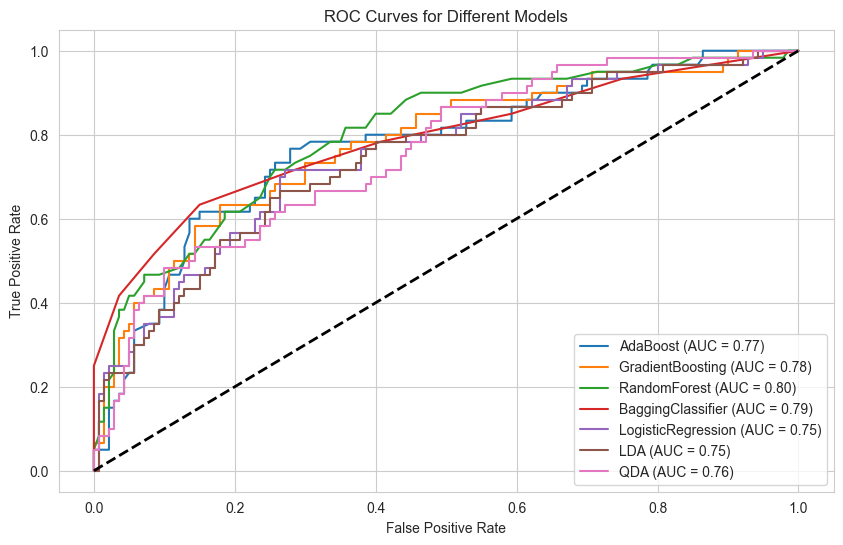

,Model,Accuracy,Precision,Recall,F1-Score,AUC Score,Confusion Matrix
2,RandomForest,0.785,0.717949,0.466667,0.565657,0.800714,"[[129, 11], [32, 28]]"
3,BaggingClassifier,0.795,0.720930,0.516667,0.601942,0.788333,"[[128, 12], [29, 31]]"
1,GradientBoosting,0.755,0.607843,0.516667,0.558559,0.778452,"[[120, 20], [29, 31]]"
0,AdaBoost,0.765,0.632653,0.516667,0.568807,0.771726,"[[122, 18], [29, 31]]"
6,QDA,0.730,0.551724,0.533333,0.542373,0.757619,"[[114, 26], [28, 32]]"
4,LogisticRegression,0.650,0.450980,0.766667,0.567901,0.752738,"[[84, 56], [14, 46]]"
5,LDA,0.740,0.625000,0.333333,0.434783,0.745119,"[[128, 12], [40, 20]]"


In [19]:
#Dictionary to store evaluation results
evaluation_results = []

#Initialize a figure for ROC curve
plt.figure(figsize=(10, 6))

#Loop through all models
for name, model in models.items():
    #Predict on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    #Classification Report (Precision, Recall, F1-Score)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    #ROC Curve & AUC Score
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    else:
        roc_auc = None  # Some models (e.g., QDA) may not have `predict_proba`

    #Store results
    evaluation_results.append({
        "Model": name,
        "Accuracy": model.score(X_test, y_test),
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"],
        "AUC Score": roc_auc,
        "Confusion Matrix": cm
    })

#Finalize ROC Curve Plot
plt.plot([0, 1], [0, 1], 'k--', lw=2)  #Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.show()

#Convert evaluation results to DataFrame
evaluation_df = pd.DataFrame(evaluation_results).sort_values(by="AUC Score", ascending=False)

#Display evaluation results
evaluation_df

<span style="color:darkgreen; font-weight:bold;">Metrics Description:</span><br>

**Accuracy:**
- This metric refers to the proportion of correct predictions, compared to the total number of predictions
- Considered when classes are balanced.

**Precision:**
- This metric refers to the proportion of positive predictions that are actually correct.
- Used when False Positives are costly.

**Recall:**
- This metric refers to the proportion of actual positive instances that the model correctly classified as positive.
- Used when False Negatives are costly.

**F1-Score:**
- This metric baalances between Precision & Recall.
- Used when classes are imbalanced.

**AUC-ROC Score:**
- This metric refers to the ability to distinguish between classes.
- Used when Decision Tresholds are adjusted.



<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>

For our data set we consider the following metrics:
- **Precision:** <br>   Considering the nature of problem (Loan Default, where False Positives leads to losing good customers) 
- **Recall:** <br>  Considering the nature of problem (Loan Default, where False Negatives leads to Loss for the bank - lending money to defaulter) 
- **F1-Score:** <br>    Imbalance in default Class & a balance is required between precision & recall
- **AUC Score:** <br>   Proper distinguishing between positive & negative classes.

**Key Observations**
| **Metric**         | **Best Model** |
|--------------------|---------------|
| **Precision**      | **Bagging Classifier (0.7209)** |
| **Recall**        | **Logistic Regression (0.7667)** |
| **F1-Score**      | **Bagging Classifier (0.6019)** |
| **AUC Score**     | **Random Forest (0.8007)** |


<span style="color:darkgreen;">Now, to finalize the best performing model, let us tune the hyper parameters of Bagging, Logistic regression & Random Forest</span><br>


##### Hyper Parameter Tuning

In [20]:
#Function to run GridSearchCV
def tune_model(model, param_grid, name):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="f1", n_jobs=-1, error_score='raise')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_cv_f1 = grid_search.best_score_
    test_f1 = f1_score(y_test, grid_search.best_estimator_.predict(X_test))
    return {"Model": name, "Best Params": best_params, "Best CV F1 Score": best_cv_f1, "Test F1 Score": test_f1}


In [21]:
#Bagging Classifier Hyperparameters
bagging_param_grid = {
                        "n_estimators": [10, 50, 100],
                        "max_samples": [0.5, 0.7, 1.0],
                        "max_features": [0.5, 0.7, 1.0],
                        "bootstrap": [True, False]
                    }

#Logistic Regression Hyperparameters
logistic_param_grid = [
                        {"C": [0.1, 1, 10], "solver": ["liblinear"], "penalty": ["l1"]},  #L1 requires liblinear
                        {"C": [0.1, 1, 10], "solver": ["lbfgs", "saga"], "penalty": ["l2"]}  #L2 works with lbfgs and saga
                    ]

#Random Forest Hyperparameters
rf_param_grid = {
                    "n_estimators": [50, 100, 200],
                    "max_depth": [None, 10, 20],
                    "min_samples_split": [2, 5, 10],
                    "min_samples_leaf": [1, 2, 4],
                    "bootstrap": [True, False]
                }

#Initialize models
bagging_model = BaggingClassifier(random_state=42)
logistic_model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

#Tune all selected models
best_models = [
                tune_model(bagging_model, bagging_param_grid, "Bagging Classifier"),
                tune_model(logistic_model, logistic_param_grid, "Logistic Regression"),
                tune_model(rf_model, rf_param_grid, "Random Forest")
            ]

#Convert results to DataFrame
best_models_df = pd.DataFrame(best_models).sort_values(by="Test F1 Score", ascending=False)


best_models_df

,Model,Best Params,Best CV F1 Score,Test F1 Score
1,Logistic Regression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.567664,0.567901
0,Bagging Classifier,"{'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}",0.501874,0.566038
2,Random Forest,"{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}",0.506441,0.563636


<span style="color:darkgreen; font-weight:bold;">Observations:</span><br>

| **Metric** | **Best Model** | **Why?** |
|------------|---------------|----------|
| **Best Cross-Validation (CV) F1 Score** | **Logistic Regression (0.5676)** | Most consistent across training folds |
| **Best Test F1 Score** | **Logistic Regression (0.5679)** | Slightly better than Bagging (0.5660) & Random Forest (0.5636) |
| **Smallest Overfitting Gap** | **Logistic Regression** | **CV F1 (0.5676) ≈ Test F1 (0.5679)** |

<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>

- **Logistic Regression performed the best** after hyperparameter tuning.
  - **Best Test F1 Score (0.5679)** → Most reliable for generalization.
  - **Minimal overfitting** (CV and Test F1 are nearly equal).
  - Best parameters: **`C: 0.1`, `penalty: l2`, `solver: lbfgs`**.

- **Bagging Classifier is the best among tree models** (0.5660 Test F1).
  - Best parameters: **`n_estimators: 50`, `max_features: 1.0`, `max_samples: 0.5`, `bootstrap: True`**.
  - Performs slightly better than Random Forest.

- **Random Forest is close (0.5636 Test F1)** but not the best.
  - Best parameters: **`n_estimators: 100`, `max_depth: None`, `min_samples_split: 2`, `min_samples_leaf: 1`, `bootstrap: False`**.
  - Tuning improved performance but didn't outperform Logistic Regression.

<br>

- Logistic regression is a linear model while Bagging & Random Forest are Tree based models.
- Tree based models perform well if the features have a non linear relationship, as they capture well the complex relationships.
- However, all the 3 models vary very slightly amongst themselves and we have already deduced that the data is mostly linear with weak non linear relationships.

<span style="color:darkgreen;">Hence, Let us evaluate the other metrices like precision, recall, AUC scores & ROC</span><br>

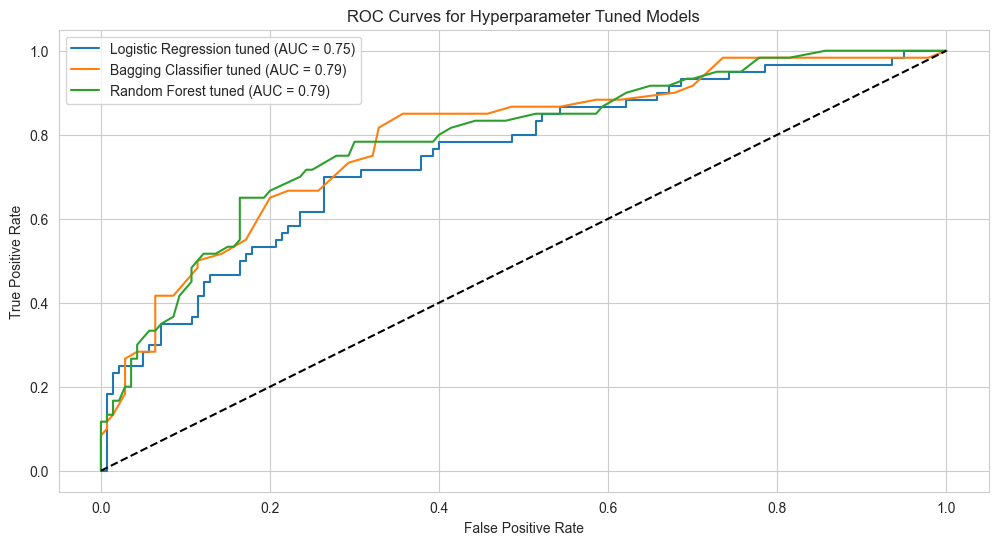

,Model,Precision,Recall,F1 Score,AUC Score,Confusion Matrix
0,Logistic Regression tuned,0.450980,0.766667,0.567901,0.751071,"[[84, 56], [14, 46]]"
1,Bagging Classifier tuned,0.652174,0.500000,0.566038,0.788571,"[[124, 16], [30, 30]]"
2,Random Forest tuned,0.620000,0.516667,0.563636,0.788512,"[[121, 19], [29, 31]]"


In [22]:
#Extract the best models from tuning results
best_bagging = BaggingClassifier(**best_models_df.loc[best_models_df['Model'] == 'Bagging Classifier', 'Best Params'].values[0], random_state=42)
best_logistic = LogisticRegression(**best_models_df.loc[best_models_df['Model'] == 'Logistic Regression', 'Best Params'].values[0], class_weight="balanced", max_iter=1000, random_state=42)
best_rf = RandomForestClassifier(**best_models_df.loc[best_models_df['Model'] == 'Random Forest', 'Best Params'].values[0], random_state=42)

#Train models on full training data
best_bagging.fit(X_train, y_train)
best_logistic.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

#Get predictions & probabilities
models = {
            "Logistic Regression tuned": best_logistic,
            "Bagging Classifier tuned": best_bagging,
            "Random Forest tuned": best_rf
        }

results = []

plt.figure(figsize=(12, 6))

for name, model in models.items():
    #Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for ROC
    
    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    precision = classification_report(y_test, y_pred, output_dict=True)['1']['precision']
    recall = classification_report(y_test, y_pred, output_dict=True)['1']['recall']
    f1 = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
    
    #ROC & AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    #Store results
    results.append({
                        "Model": name,
                        "Precision": precision,
                        "Recall": recall,
                        "F1 Score": f1,
                        "AUC Score": roc_auc,
                        "Confusion Matrix": cm.tolist()
                    })

    #Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

#Final ROC Curve plot
plt.plot([0, 1], [0, 1], 'k--')  #Diagonal line (random model)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Hyperparameter Tuned Models")
plt.legend()
plt.show()

#Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)

#Display the results
results_df


<span style="color:darkgreen; font-weight:bold;">Observation:</span><br>

**Metrics**
| **Metric** | **Best Model** | **Why?** |
|------------|---------------|----------|
| **Best Precision** | ✅ **Bagging Classifier (0.652)** | Fewer false positives (more confident predictions). |
| **Best Recall** | ✅ **Logistic Regression (0.767)** | Caught more actual defaulters but has lower precision. |
| **Best F1 Score (Balance of Precision & Recall)** | ✅ **Logistic Regression (0.568)** | Most balanced performance. |
| **Best AUC Score** | ✅ **Bagging (0.789) & Random Forest (0.789)** | Both tree models have a stronger ability to distinguish classes. |


**Confusion Matrices**
| **Model** | **Confusion Matrix** | **Interpretation** |
|-----------|----------------------|--------------------|
| **Logistic Regression** | `[[84, 56], [14, 46]]` | **High recall (caught 46 defaulters)** but **many false positives (56 non-defaulters misclassified as defaulters).** |
| **Bagging Classifier** | `[[124, 16], [30, 30]]` | **Better precision (fewer false positives - 16)** but **lower recall (missed 30 defaulters).** |
| **Random Forest** | `[[121, 19], [29, 31]]` | **Similar to Bagging but slightly lower precision.** |


<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>

- **Logistic Regression** = More aggressive at predicting defaulters (**higher recall**) but at the cost of more false positives.
- **Bagging & Random Forest** = **More conservative**, correctly predicting non-defaulters with higher precision, but missing some actual defaulters (**lower recall**).


<span style="color:darkgreen; font-weight:bold;">Model Selection:</span><br>

Depending up on the requirement, we can select the model:
- **If the goal is to catch as many loan defaulters as possible** → Choose **Logistic Regression** (high recall).
- **If the goal is to reduce the number of false alarms (false positives)** → Choose **Bagging Classifier** (higher precision).
- **If the want an overall balanced model** → Choose **Bagging or Random Forest**.


<span style="color:darkgreen;">However, let us further investigate the feature importance in the models to see if the models can be improved</span><br>


##### Feature Importance

In [23]:
#Extract feature names
feature_names = X_train.columns.tolist()

#Get feature importances from tree-based models
bagging_importance = best_bagging.estimators_[0].feature_importances_  #Averaging across estimators
rf_importance = best_rf.feature_importances_

#Logistic Regression feature importance (absolute coefficients)
logistic_importance = np.abs(best_logistic.coef_[0])  #Taking absolute value

#Create DataFrames for visualization
importance_df = pd.DataFrame({
                                "Feature": feature_names,
                                "Logistic Regression": logistic_importance,
                                "Bagging Classifier": bagging_importance,
                                "Random Forest": rf_importance
                            }).set_index("Feature")

#Sort by importance for better visualization
importance_df = importance_df.sort_values(by="Random Forest", ascending=False)

importance_df

,Logistic Regression,Bagging Classifier,Random Forest
Feature,,,
amount,0.228204,0.246454,0.161543
age,0.103192,0.124112,0.122930
checking_balance,0.608539,0.145724,0.119416
months_loan_duration,0.296273,0.059232,0.108834
credit_history,0.288397,0.078460,0.060494
savings_balance,0.195658,0.027776,0.056908
employment_duration,0.122244,0.055085,0.054157
years_at_residence,0.020065,0.023198,0.049153
purpose,0.014395,0.030074,0.048978


<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>

<span style="color:darkgreen; font-weight:bold;">Top 5 Most Important Features in Each Model:</span><br>

| **Model** | **Top Features (Most Important First)** |
|-----------|---------------------------------|
| **Logistic Regression** | `checking_balance`, `months_loan_duration`, `credit_history`, `percent_of_income`, `amount` |
| **Bagging Classifier** | `amount`, `age`, `checking_balance`, `credit_history`, `purpose` |
| **Random Forest** | `amount`, `age`, `checking_balance`, `months_loan_duration`, `purpose` |

<span style="color:darkgreen; font-weight:bold;">Common Important Features Across Models:</span><br>

- **Amount of Loan (`amount`)** → Highly important in all models.
- **Checking Balance (`checking_balance`)** → Critical in all models.
- **Months Loan Duration (`months_loan_duration`)** → Significant in Logistic Regression & Random Forest.
- **Credit History (`credit_history`)** → Influential in all models.
- **Age (`age`)** → Important in tree-based models.


<span style="color:darkgreen; font-weight:bold;">Differences Between Models:</span><br>

| **Observation** | **What It Means?** |
|----------------|--------------------|
| **Logistic Regression prioritizes `checking_balance` & `credit_history`** | It assumes a linear relationship where customers with a low checking balance and bad credit history are more likely to default. |
| **Bagging & Random Forest give more weight to `amount` & `age`** | These models capture **complex interactions** where higher loan amounts and older customers might influence default probability. |
| **`purpose` is more important in tree-based models** | Some purposes (e.g., home loans vs. car loans) may have different default risks, which tree models capture. |

<span style="color:darkgreen; font-weight:bold;">Interpretation:</span><br>

| **Feature** | **Interpretation** |
|------------|----------------------------|
| **Checking Balance** | Customers with **low checking balances** are at **higher risk** of default. |
| **Loan Amount** | **Higher loan amounts** increase default risk. |
| **Credit History** | A **bad credit history** signals a **higher likelihood of default**. |
| **Months Loan Duration** | **Longer loan durations** might increase risk, possibly due to changes in financial stability. |
| **Age** | **Older customers** may have **stable financials** (lower risk), while younger ones may have **less financial history**. |
| **Purpose** | Certain **loan purposes** (e.g., car loans, business loans) might be **riskier** than others. |

#### Model Fitting & Evaluation on top features

In [24]:
#Select only the top features
selected_features = ["checking_balance", "months_loan_duration", "credit_history", "percent_of_income", "amount", "age", "purpose"]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

#Train Models
best_bagging.fit(X_train_selected, y_train)
best_logistic.fit(X_train_selected, y_train)
best_rf.fit(X_train_selected, y_train)

#Evaluate performance
y_pred_rf = best_rf.predict(X_test_selected)
y_pred_bagging = best_bagging.predict(X_test_selected)
y_pred_logistic = best_logistic.predict(X_test_selected)

#Compute F1 scores
f1_rf = f1_score(y_test, y_pred_rf)
f1_bagging = f1_score(y_test, y_pred_bagging)
f1_logistic = f1_score(y_test, y_pred_logistic)

print(f"Random Forest F1 Score (Selected top Features): {f1_rf:.4f}")
print(f"Bagging Classifier F1 Score (Selected top Features): {f1_bagging:.4f}")
print(f"Logistic Regression F1 Score (Selected top Features): {f1_logistic:.4f}")


Random Forest F1 Score (Selected top Features): 0.5185
Bagging Classifier F1 Score (Selected top Features): 0.5926
Logistic Regression F1 Score (Selected top Features): 0.5750


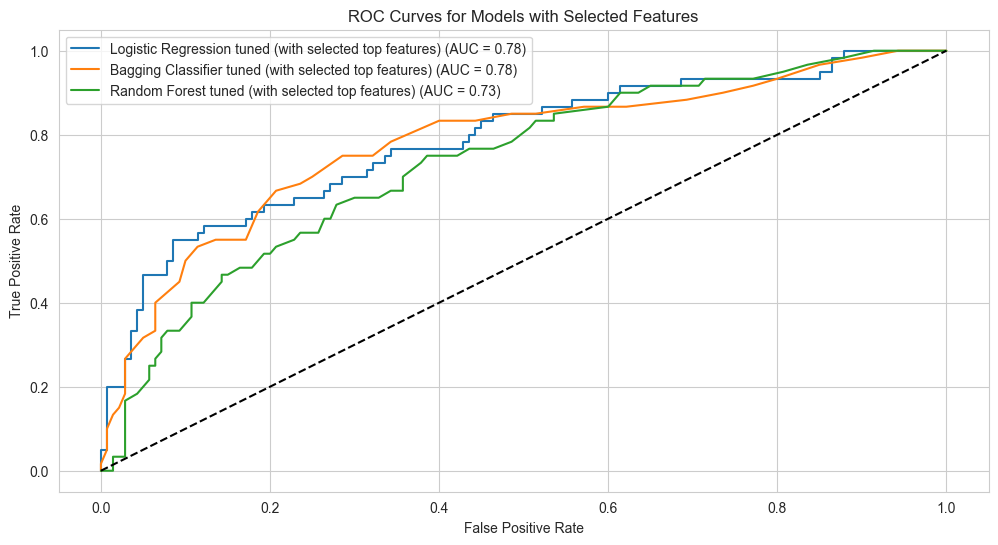

,Model,Precision,Recall,F1 Score,AUC Score,Confusion Matrix
1,Bagging Classifier tuned (with selected top features),0.666667,0.533333,0.592593,0.778810,"[[124, 16], [28, 32]]"
0,Logistic Regression tuned (with selected top features),0.460000,0.766667,0.575000,0.784762,"[[86, 54], [14, 46]]"
2,Random Forest tuned (with selected top features),0.583333,0.466667,0.518519,0.733929,"[[120, 20], [32, 28]]"


In [25]:
#Get predictions & probabilities
models = {
            "Logistic Regression tuned (with selected top features)": best_logistic,
            "Bagging Classifier tuned (with selected top features)": best_bagging,
            "Random Forest tuned (with selected top features)": best_rf
        }


#Initialize results storage
metrics = []

plt.figure(figsize=(12, 6))


for model_name, model in models.items():
    #Predictions
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:, 1]  # Probability scores for ROC
    
    
    precision = classification_report(y_test, y_pred, output_dict=True)['1']['precision']
    recall = classification_report(y_test, y_pred, output_dict=True)['1']['recall']
    f1 = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'] 
    #ROC & AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    #Store results
    metrics.append({
                        "Model": model_name,
                        "Precision": precision,
                        "Recall": recall,
                        "F1 Score": f1,
                        "AUC Score": roc_auc,
                        "Confusion Matrix": cm.tolist()
                    })


    #Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Finalize ROC Curve plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models with Selected Features")
plt.legend()
plt.show()

# Convert results to DataFrame and print
metrics_df = pd.DataFrame(metrics).sort_values(by="F1 Score", ascending=False)
metrics_df


<span style="color:darkgreen; font-weight:bold;">General Observation:</span><br>

It can be observed that all the metrices are improved for **Bagging Classifier** and **Logistic Regression** when compared with corresponding models that used all the features. However, Random Forest has declined c ompared to previous observation. <br><br><span style="color:darkgreen;"> However, since the metrices are good in Bagging Classifier & Logistic Regression with selected top features, we can consider them for further analysis.</span><br>

<span style="color:darkgreen; font-weight:bold;">Observation:</span><br>

**Metrics**
| **Metric**       | **Best Model**          | **Why?**  |
|----------------|----------------------|----------|
| **Best Precision**  | **Bagging Classifier (0.667)** | More confidence in positive (default) predictions (fewer false positives). |
| **Best Recall**  | **Logistic Regression (0.767)** | Caught the highest proportion of actual defaulters (fewer false negatives). |
| **Best F1 Score**  | **Bagging Classifier (0.593)** | Best balance between precision and recall. |
| **Best AUC Score**  | **Logistic Regression (0.785)** | Best overall classification ability. |

**Confusion Matrices**
| **Model** | **Confusion Matrix** | **Interpretation** |
|-----------|----------------------|--------------------|
| **Bagging Classifier** | `[[124, 16], [28, 32]]` | Best **precision**, but missed **28 defaulters**. |
| **Logistic Regression** | `[[86, 54], [14, 46]]` | Best **recall**, but misclassified **54 non-defaulters** as defaulters. |
| **Random Forest** | `[[120, 20], [32, 28]]` | Balanced, but lower **AUC Score**. |

<span style="color:darkgreen; font-weight:bold;">Insights:</span><br>

- **Logistic Regression** is more aggressive at predicting defaulters (**higher recall**) but results in more false positives.
- **Bagging & Random Forest** are **more conservative**, correctly predicting non-defaulters with **higher precision**, but missing some actual defaulters (**lower recall**).


<span style="color:darkgreen; font-weight:bold;">Model Selection:</span><br>

Depending up on the requirement, we can select the model:
- **If the goal is to catch as many loan defaulters as possible** → Choose **Logistic Regression** (high recall).
- **If the goal is to reduce the number of false alarms (false positives)** → Choose **Bagging Classifier** (higher precision).
- **If the want an overall balanced model** → Choose **Bagging Classifier** Best *F1 Score* (0.593) and *good AUC* (0.779).


<span style="color:darkgreen;">Now, to finalize the best performing model, let us investigate if ensemble of Logistic Regression & Bagging Classifier helps</span><br>


#### Ensemble Approach (Voting Classifier)

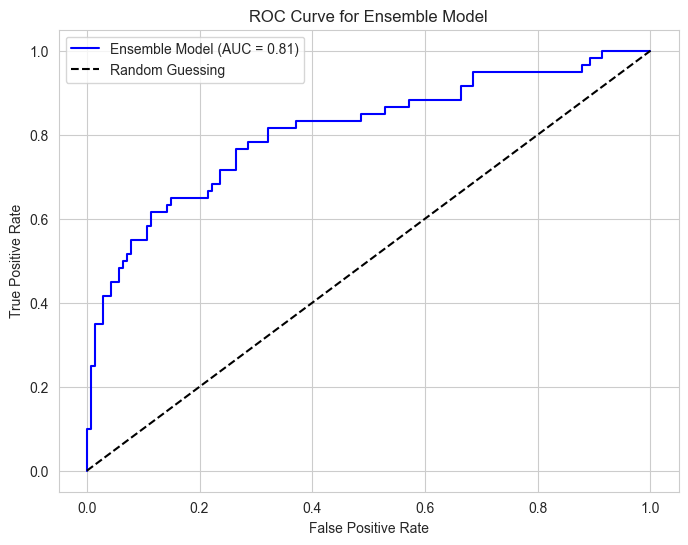

,Model,Precision,Recall,F1 Score,AUC Score,Confusion Matrix
0,Ensemble (Logistic + Bagging),0.569444,0.683333,0.621212,0.808929,"[[109, 31], [19, 41]]"


In [26]:
#Create an ensemble using VotingClassifier (soft voting for probability-based averaging)
ensemble_model = VotingClassifier(
                                    estimators=[
                                                    ('logistic', best_logistic),
                                                    ('bagging', best_bagging)
                                                ],
                                    voting='soft'  #'soft' uses probability averaging, 'hard' uses majority voting
                                )

#Train ensemble model on selected features
ensemble_model.fit(X_train_selected, y_train)

#Predictions
y_pred_ensemble = ensemble_model.predict(X_test_selected)
y_prob_ensemble = ensemble_model.predict_proba(X_test_selected)[:, 1]


precision = classification_report(y_test, y_pred_ensemble, output_dict=True)['1']['precision']
recall = classification_report(y_test, y_pred_ensemble, output_dict=True)['1']['recall']
f1 = classification_report(y_test, y_pred_ensemble, output_dict=True)['1']['f1-score'] 
#ROC & AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_ensemble)
roc_auc = auc(fpr, tpr)
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ensemble)

#Store ensemble results
ensemble_metrics = pd.DataFrame([{
                                    "Model": "Ensemble (Logistic + Bagging)",
                                    "Precision": precision,
                                    "Recall": recall,
                                    "F1 Score": f1,
                                    "AUC Score": roc_auc,
                                    "Confusion Matrix": cm.tolist()
                                }])

#Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Ensemble Model (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Ensemble Model")
plt.legend()
plt.show()

ensemble_metrics


<span style="color:darkgreen;">Ensemble approach seems to have a good balance across metrics.<br> Lets further investigate the results of all the approaches that has been tried to arrive at final model recommendation.</span><br>


##### Final Model Evaluation

In [27]:
#Creating the corrected dataset from the extracted text
models_results= [
                    ("RandomForest", 0.717949, 0.466667, 0.565657, 0.800714),
                    ("BaggingClassifier", 0.720930, 0.516667, 0.601942, 0.788333),
                    ("GradientBoosting", 0.607843, 0.516667, 0.558559, 0.778452),
                    ("AdaBoost", 0.632653, 0.516667, 0.568807, 0.771726),
                    ("QDA", 0.551724, 0.533333, 0.542373, 0.757619),
                    ("LogisticRegression", 0.450980, 0.766667, 0.567901, 0.752738),
                    ("LDA", 0.625000, 0.333333, 0.434783, 0.745119),
                    ("Logistic Regression tuned", 0.450980, 0.766667, 0.567901, 0.751071),
                    ("Bagging Classifier tuned", 0.652174, 0.500000, 0.566038, 0.788571),
                    ("Random Forest tuned", 0.620000, 0.516667, 0.563636, 0.788512),
                    ("Bagging Classifier tuned (selected features)", 0.666667, 0.533333, 0.592593, 0.778810),
                    ("Logistic Regression tuned (selected features)", 0.460000, 0.766667, 0.575000, 0.784762),
                    ("Random Forest tuned (selected features)", 0.583333, 0.466667, 0.518519, 0.733929),
                    ("Ensemble (Logistic + Bagging)", 0.569444, 0.683333, 0.621212, 0.808929)
                ]

#Creating a DataFrame
df_models_results = pd.DataFrame(models_results, columns=["Model", "Precision", "Recall", "F1-Score", "AUC Score"])

df_models_results


,Model,Precision,Recall,F1-Score,AUC Score
0,RandomForest,0.717949,0.466667,0.565657,0.800714
1,BaggingClassifier,0.720930,0.516667,0.601942,0.788333
2,GradientBoosting,0.607843,0.516667,0.558559,0.778452
3,AdaBoost,0.632653,0.516667,0.568807,0.771726
4,QDA,0.551724,0.533333,0.542373,0.757619
5,LogisticRegression,0.450980,0.766667,0.567901,0.752738
6,LDA,0.625000,0.333333,0.434783,0.745119
7,Logistic Regression tuned,0.450980,0.766667,0.567901,0.751071
8,Bagging Classifier tuned,0.652174,0.500000,0.566038,0.788571
9,Random Forest tuned,0.620000,0.516667,0.563636,0.788512


<span style="color:darkgreen; font-weight:bold;"> Segregating models based on business needs:</span><br>

In [28]:
#Identifying best models for different business needs
best_recall_model = df_models_results.loc[df_models_results["Recall"].idxmax()]
best_precision_model = df_models_results.loc[df_models_results["Precision"].idxmax()]
best_balanced_model = df_models_results.loc[df_models_results[["F1-Score", "AUC Score"]].mean(axis=1).idxmax()]

#Creating a summary DataFrame
models_business_needs = pd.DataFrame([
                                        {"Scenario": "High Recall (Minimize Missed Defaulters)", **best_recall_model},
                                        {"Scenario": "High Precision (Minimize Wrong Rejections)", **best_precision_model},
                                        {"Scenario": "Balanced (F1-Score & AUC)", **best_balanced_model}
                                    ])

#Displaying the results
models_business_needs

,Scenario,Model,Precision,Recall,F1-Score,AUC Score
0,High Recall (Minimize Missed Defaulters),LogisticRegression,0.450980,0.766667,0.567901,0.752738
1,High Precision (Minimize Wrong Rejections),BaggingClassifier,0.720930,0.516667,0.601942,0.788333
2,Balanced (F1-Score & AUC),Ensemble (Logistic + Bagging),0.569444,0.683333,0.621212,0.808929


<span style="color:darkgreen; font-weight:bold;"> Identifying the best balanced model based on Geometric Mean:</span><br>

The purpose of selecting Geometric mean is as follows:
- In Simple Averaging, All Metrics Are Treated Equally & Business Context Is Ignored.
- In Weighted Averaging, weights are assigned to each metric based on its importance, however, here we dont have that context, which requires further investigation with the Biz.  
- Geometric mean is used to penalize low-performing metrics more
- This ensures that if any one metric is too low, it significantly impacts the final score.

<span style="color:darkgreen;">Thus, Geometric mean method ensures that low values in any one metric significantly impact the final score, making it a robust way to select the most balanced model.</span>

In [29]:
#Compute the Geometric Mean for a more balanced evaluation
df_models_results["Geometric Balanced Score"] = (
                                                    df_models_results["Precision"] * 
                                                    df_models_results["Recall"] * 
                                                    df_models_results["F1-Score"] * 
                                                    df_models_results["AUC Score"]
                                                ) ** (1/4)  # Fourth root for equal contribution of all metrics


df_models_results


,Model,Precision,Recall,F1-Score,AUC Score,Geometric Balanced Score
0,RandomForest,0.717949,0.466667,0.565657,0.800714,0.624141
1,BaggingClassifier,0.720930,0.516667,0.601942,0.788333,0.648399
2,GradientBoosting,0.607843,0.516667,0.558559,0.778452,0.607891
3,AdaBoost,0.632653,0.516667,0.568807,0.771726,0.615462
4,QDA,0.551724,0.533333,0.542373,0.757619,0.589681
5,LogisticRegression,0.450980,0.766667,0.567901,0.752738,0.620041
6,LDA,0.625000,0.333333,0.434783,0.745119,0.509699
7,Logistic Regression tuned,0.450980,0.766667,0.567901,0.751071,0.619697
8,Bagging Classifier tuned,0.652174,0.500000,0.566038,0.788571,0.617668
9,Random Forest tuned,0.620000,0.516667,0.563636,0.788512,0.614260


In [30]:
#Select the model with the highest geometric balanced score
best_geometric_balanced_model = df_models_results.loc[df_models_results["Geometric Balanced Score"].idxmax()]

#Creating a summary DataFrame for the best geometric balanced model
best_geometric_balanced_model_summary = pd.DataFrame([
                                                        {"Scenario": "Best Overall Balanced Model (Geometric Mean of 4 Metrics)", **best_geometric_balanced_model}
                                                    ])

best_geometric_balanced_model_summary

,Scenario,Model,Precision,Recall,F1-Score,AUC Score,Geometric Balanced Score
0,Best Overall Balanced Model (Geometric Mean of 4 Metrics),Ensemble (Logistic + Bagging),0.569444,0.683333,0.621212,0.808929,0.66498


#### Final Model Recommendation 

Depending up on the requirement, we can select the model:
- If the goal is to <span style="color:darkgreen;">catch as many loan defaulters as possible</span> → Choose <span style="color:darkgreen;"> **Logistic Regression** </span>(*high recall*).
- If the goal is to <span style="color:darkgreen;">reduce the number of false alarms (false positives) </span> → Choose <span style="color:darkgreen;">**Bagging Classifier** </span>(*higher precision*).
- If the goal is an <span style="color:darkgreen;">overall balanced model </span> → Choose <span style="color:darkgreen;">**Ensemble (Logistic + Bagging)** </span>Best *F1 Score* and *AUC*.


## End